# Linear regression

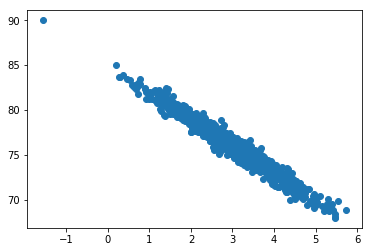

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

pageSpeeds = np.random.normal(3.0,1.0,1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(5,0.2,1000)) * 3
#purchaseAmount = purchaseAmount + np.arange(0,10,0.01)
plt.scatter(pageSpeeds, purchaseAmount)  
plt.show()

In [5]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [6]:
r_value ** 2

0.96043505670637486

In [232]:
# Accoding to the definition:
# slope = correlation(x,y) * sd(y) / sd(x)

slope_def = correlation(pageSpeeds, purchaseAmount) * np.std(purchaseAmounts) / np.std(pageSpeed)
slope_def, slope


NameError: name 'correlation' is not defined

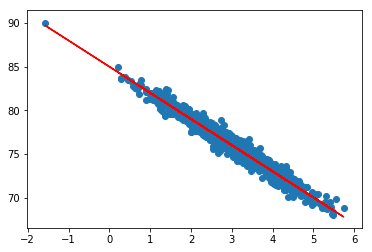

In [7]:
def predictLine(x):
    return intercept + slope * x

plt.plot(pageSpeeds, predictLine(pageSpeeds), c = "r")
plt.scatter(pageSpeeds, purchaseAmount) 
plt.show()

## Polynomial regression

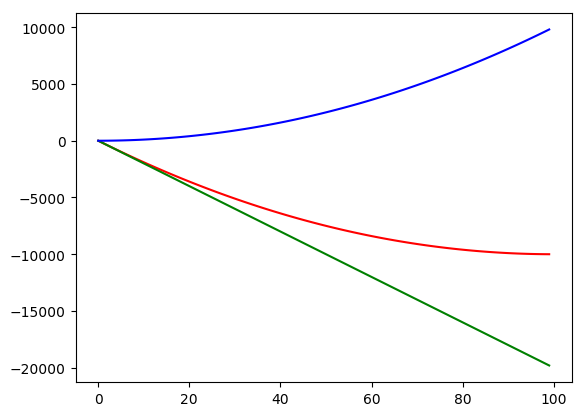

In [446]:
x = np.arange(0,100)
def polynomialReg(x, a, b, c):
    return a * x ** 2 + b * x + c
a = 1
b = -200
c = 0
y = polynomialReg(x, a, b, c)
plt.plot(x, y, c = "r")
plt.plot(x, b*x, c = "g")
plt.plot(x, a*x**2, c = "b")
plt.show()

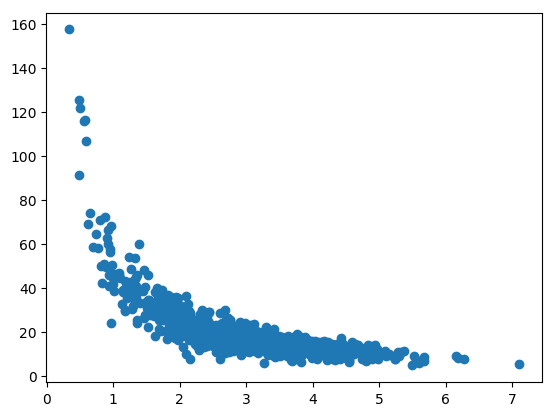

In [451]:
np.random.seed(2)
pageSpeeds = np.random.normal(3,1,1000)
purchaseAmount = np.random.normal(50,10,1000) / pageSpeeds
plt.scatter(pageSpeeds,purchaseAmount)
plt.show()

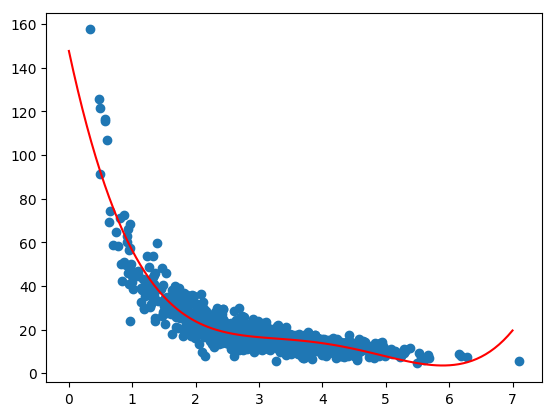

In [481]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x,y,4))
xp = np.linspace(0,7,100)
#xp = np.arange(0,7,0.01)
plt.scatter(x,y)
plt.plot(xp, p4(xp), c = 'r')
plt.show()

In [480]:
# let's compute r-squared error
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))
r2

0.87783697817121031

## Multivariate regression


In [ ]:
import pandas as pd
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [492]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [515]:
import statsmodels.api as sm

df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage', 'Model_ord', 'Doors']]
y = df[['Price']]

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Fri, 02 Aug 2019   Prob (F-statistic):           1.98e-07
Time:                        19:15:46   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000    2.77e+04    3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000      -0.259      -0.095
Model_ord    -39.0387     39.326     -0.993      0.321    -116.234      38.157
Doors      -1652.9303    402.649     -4.105      0.000   -2443.303    -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [507]:

y.groupby(df.Doors).mean()

,Price
Doors,
2,23807.135520
4,20580.670749


# Machine Learning


## Regression: Train/Test to prevent overfitting of Polynomial regression

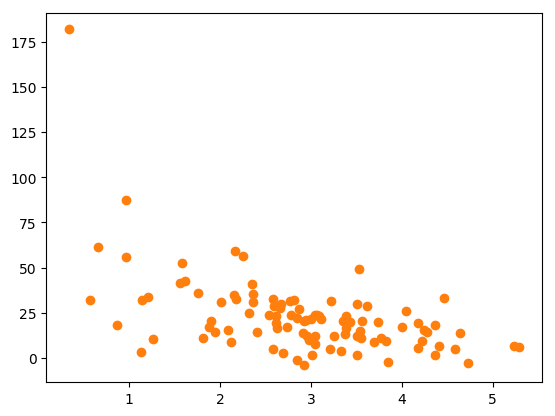

In [521]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0,30.0,100) / pageSpeeds
plt.scatter(pageSpeeds, purchaseAmount)
plt.show()

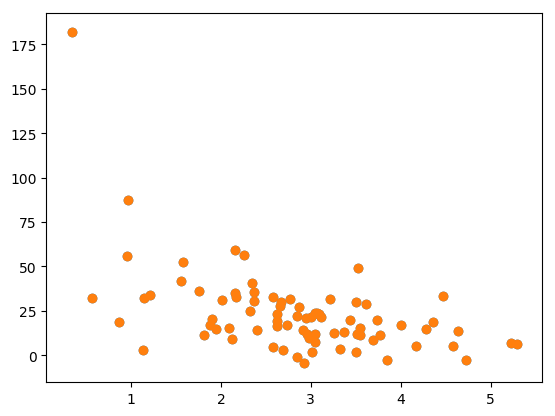

In [547]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]
trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

plt.scatter(trainX, trainY)
plt.show()

In [587]:
x = np.array(trainX)
y = np.array(trainY)
p4 = np.poly1d(np.polyfit(trainX,trainY,5))

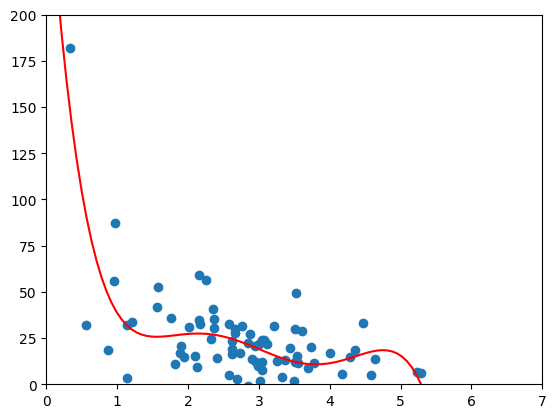

In [588]:
import matplotlib.pyplot as plt

xp = np.linspace(0,7,100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(trainX, trainY)
plt.plot(xp,p4(xp), c='r')
plt.show()

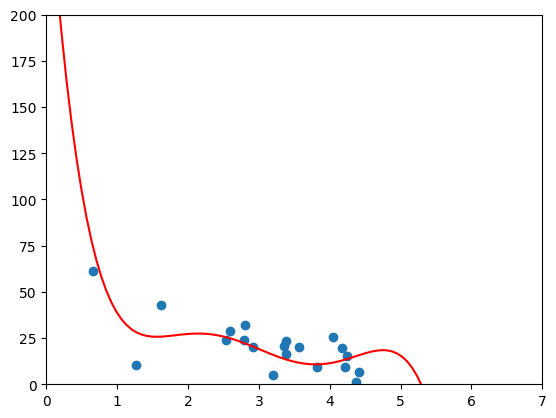

In [589]:
plt.axes().set_xlim([0,7])
plt.axes().set_ylim([0,200])
plt.scatter(testX, testY)
plt.plot(xp, p4(xp), c = 'r')
plt.show()

In [590]:
from sklearn.metrics import r2_score

r2 = r2_score(testY, p4(testX))
r2

0.50407238971943991

In [591]:
r2 = r2_score(trainY, p4(trainX))
r2

0.5544872536567732

## Naive Bayes: spam email classificator

In [619]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)
            
            inBody = False
            lines = []
            f = io.open(path, 'r',encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message

def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)
    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

data = data.append(dataFrameFromDirectory('/Users/Andrew/python/notebooks/emails/spam', 'spam'))
data = data.append(dataFrameFromDirectory('/Users/Andrew/python/notebooks/emails/ham', 'ham'))

In [620]:
data.head()

,class,message
/Users/Andrew/python/notebooks/emails/spam/00249.5f45607c1bffe89f60ba1ec9f878039a,spam,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
/Users/Andrew/python/notebooks/emails/spam/00373.ebe8670ac56b04125c25100a36ab0510,spam,ATTENTION: This is a MUST for ALL Computer Use...
/Users/Andrew/python/notebooks/emails/spam/00214.1367039e50dc6b7adb0f2aa8aba83216,spam,This is a multi-part message in MIME format.\n...
/Users/Andrew/python/notebooks/emails/spam/00210.050ffd105bd4e006771ee63cabc59978,spam,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
/Users/Andrew/python/notebooks/emails/spam/00033.9babb58d9298daa2963d4f514193d7d6,spam,This is the bottom line. If you can GIVE AWAY...


In [621]:
path = '/Users/Andrew/python/notebooks/emails/spam'
#n = 0
for root, dirnames, filenames in os.walk(path):
    for filename in filenames:
        #n += 1
        path = os.path.join(root, filename)
        #print path
        f = io.open(path,'r',encoding = 'latin1')
        inBody = False
        lines = []
        linesHead = []
        for line in f:
            if inBody:
                lines.append(line)
            elif line == '\n':
                inBody = True
            else:
                linesHead.append(line)
        f.close()
        message = '\n'.join(lines)
        #print linesHead
        #print message
        break
#print n        

In [634]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)
#counts[1]
classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [646]:
examples = ['Free Viagra now!!!', 'Hi Bob, how about a game of golf tomorrow?', 'Hi Andy! Do you have a dose of viagra for me?', 'Hi Tom! Are you free today?']
examples_counts = vectorizer.transform(examples)
predictions = classifier.predict(examples_counts)
predictions

array(['spam', 'ham', 'ham', 'ham'],
      dtype='|S4')

In [686]:
for i in np.arange(1,200):
    example = []
    example.append(data['message'][i])
    #data['message'][i]
    #break
    example_count = vectorizer.transform(example)
    prediction = classifier.predict(example_count)
    #print prediction[0]
    b = prediction[0] == data['class'][i]
    print i, " : ", b, " prediction:", prediction, "class: ", data['class'][i]

    


1  :  True  prediction: ['spam'] class:  spam
2  :  True  prediction: ['spam'] class:  spam
3  :  True  prediction: ['spam'] class:  spam
4  :  False  prediction: ['ham'] class:  spam
5  :  True  prediction: ['spam'] class:  spam
6  :  True  prediction: ['spam'] class:  spam
7  :  True  prediction: ['spam'] class:  spam
8  :  True  prediction: ['spam'] class:  spam
9  :  True  prediction: ['spam'] class:  spam
10  :  True  prediction: ['spam'] class:  spam
11  :  False  prediction: ['ham'] class:  spam
12  :  True  prediction: ['spam'] class:  spam
13  :  True  prediction: ['spam'] class:  spam
14  :  True  prediction: ['spam'] class:  spam
15  :  True  prediction: ['spam'] class:  spam
16  :  True  prediction: ['spam'] class:  spam
17  :  True  prediction: ['spam'] class:  spam
18  :  False  prediction: ['ham'] class:  spam
19  :  True  prediction: ['spam'] class:  spam
20  :  True  prediction: ['spam'] class:  spam
21  :  True  prediction: ['spam'] class:  spam
22  :  False  predicti

## K mean clustering


In [736]:
import numpy as np
import matplotlib.pyplot as plt

def createClusteredData(N,k):
    np.random.seed(2)
    pointsPerCluster = float(N)/k
    X = []
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0,200000.0)
        ageCentroid = np.random.uniform(20.0,70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
    X = np.array(X)
    return X

#plt.scatter(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


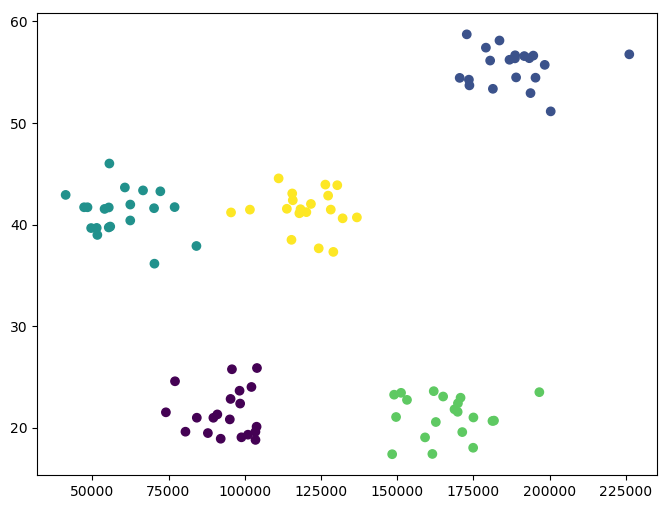

In [745]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

data = createClusteredData(100,5)

model = KMeans(n_clusters = 5)

# it's important to scale data to normilize!
model = model.fit(scale(data))

# clusters each data point was asigned to
print model.labels_

plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c = model.labels_.astype(np.float))
plt.show()
#model

In [733]:
scale(data[1:5,:])

array([[-0.15791301, -0.95738039],
       [-0.25201302,  1.4734974 ],
       [-1.17842653,  0.36605679],
       [ 1.58835255, -0.8821738 ]])

## Decision trees

In [19]:
import numpy as np
import pandas as pd
from sklearn import tree

url = "/Users/Andrew/python/notebooks/PastHires.csv"
df = pd.read_csv(url, header = 0)

In [12]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [20]:
# scikit-learn needs numerical data. We'll use map() to map categorical data to numerical. 
# In real world we need to deal also with unexpected and missing data.
# By using map() we also know we'll get NaN for unexpected data

d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

df.head()


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [66]:
# separate the features from the target
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [51]:
y = df['Hired']
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [52]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data,
                    feature_names = features)
#graph = pydot.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

In [62]:
# using a random forest to escape overfitting
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(X,y)

# predict employment of an employed 10-years veteran
print clf.predict([[10,1,4,0,0,0]])
# predict employment of an unemployed 10-years veteran
print clf.predict([[10,0,4,0,0,0]])

[1]
[0]


## Support Vector Machines

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def createClusteredData(N,k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0, 200000)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid,10000), np.random.normal(ageCentroid,2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X,y

[[  2.00366709e+05   4.10456511e+01]
 [  1.78126904e+05   3.93389688e+01]
 [  1.90874260e+05   4.19781215e+01]
 [  1.82574007e+05   4.38464542e+01]
 [  1.97931785e+05   4.30430820e+01]]
[0 0 0 0 0]


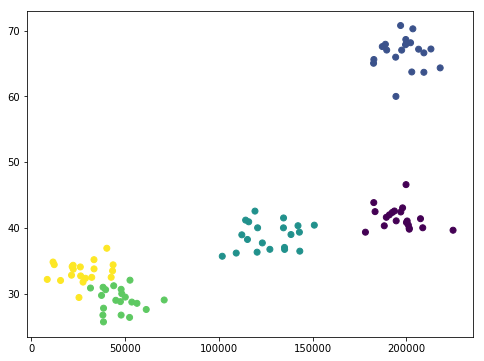

In [10]:
(X, y) = createClusteredData(100,5)
print X[:5]
print y[:5]
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y.astype(np.float))
plt.show()


In [7]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel = "linear", C = C).fit(X,y)

(3000000,)
(120, 25000)


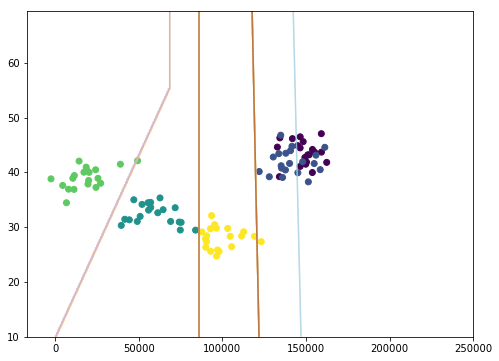

In [144]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                        np.arange(10,70,0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.figure(figsize = (8,6))
    print Z.shape
    Z = Z.reshape(xx.shape)
    print Z.shape
    plt.contour(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
    plt.scatter(X[:,0], X[:,1], c = y.astype(np.float))
    plt.show()
   
    
plotPredictions(svc)

In [140]:
svc.support_vectors_
svc.support_
svc.n_support_

array([10, 10,  4,  2,  3], dtype=int32)

In [21]:
svc.predict(np.c_[0, 50])


array([1])

## Finding Similar Movie

In [165]:
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('/Users/Andrew/python/notebooks/ml-100k/u.data', sep='\t',names = r_cols,usecols=range(3))
m_cols = ['movie_id', 'title']
movies = pd.read_csv('/Users/Andrew/python/notebooks/ml-100k/u.item.txt', sep='|', names=m_cols, usecols=range(2))
ratings = pd.merge(movies, ratings)
#movies.head()
ratings.head()


,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [166]:
movieRatings = ratings.pivot_table(index=['user_id'],columns=['title'], values='rating')
movieRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
starWarsRatings = movieRatings['Star Wars (1977)']
starWarsRatings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [168]:
similarMovies = movieRatings.corrwith(starWarsRatings)

similarMovies = similarMovies.dropna()
df = pd.DataFrame(similarMovies)
df.head(10)

,0
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [212]:

df.index.name = "Film title"
df.column = ["Correlation"]
#df.sort_values(by = ['Correlation'])


In [213]:
# if we sort by correltion we'll see not appropriate results: films with high correlation have nothing common with Star Wars
# the cause is (?) we do not took into account that some films were rated by few people - not strong evidence
movieStats = ratings.groupby('title').agg({'rating': [np.size, np.mean]})
movieStats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [220]:
# let's get rid of films rated by fewer than 100 people
popularMovies = movieStats['rating']['size'] >= 100
movieStats[popularMovies].sort_values([('rating', 'mean')], ascending=False)[1:10]


rating          
                                   size      mean
title                                            
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    584  4.359589
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929

In [219]:
# let's join this data with the original dataset
df = movieStats[popularMovies].join(pd.DataFrame(similarMovies, columns=['similarity']))
df.head()

/Users/Andrew/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(rating, size)","(rating, mean)",similarity
title,,,
101 Dalmatians (1996),109,2.908257,0.211132
12 Angry Men (1957),125,4.344000,0.184289
2001: A Space Odyssey (1968),259,3.969112,0.230884
Absolute Power (1997),127,3.370079,0.085440
"Abyss, The (1989)",151,3.589404,0.203709


In [221]:
df.sort_values(['similarity'], ascending = False)[:10]

,"(rating, size)","(rating, mean)",similarity
title,,,
Star Wars (1977),584,4.359589,1.000000
"Empire Strikes Back, The (1980)",368,4.206522,0.748353
Return of the Jedi (1983),507,4.007890,0.672556
Raiders of the Lost Ark (1981),420,4.252381,0.536117
Austin Powers: International Man of Mystery (1997),130,3.246154,0.377433
"Sting, The (1973)",241,4.058091,0.367538
Indiana Jones and the Last Crusade (1989),331,3.930514,0.350107
Pinocchio (1940),101,3.673267,0.347868
"Frighteners, The (1996)",115,3.234783,0.332729


## Item-Based Collaborative Filtering

In [222]:
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('/Users/Andrew/python/notebooks/ml-100k/u.data', sep='\t',names = r_cols,usecols=range(3))
m_cols = ['movie_id', 'title']
movies = pd.read_csv('/Users/Andrew/python/notebooks/ml-100k/u.item.txt', sep='|', names=m_cols, usecols=range(2))
ratings = pd.merge(movies, ratings)
#movies.head()
ratings.head()


,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [223]:
userRatings = ratings.pivot_table(index = ['user_id'], columns=['title'], values='rating')
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
corrMatrix = userRatings.corr()
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN


In [369]:
# let's get rid of results where fewer than 100 user rated a movie
corrMatrix = userRatings.corr(method='pearson', min_periods = 100)
corrMatrix.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [375]:
from scipy import stats
x = [1,0,0,0,1,0,0,1]
y = [1,0,0,0,1,0,0,0]
np.corrcoef(x,y)

array([[ 1.        ,  0.74535599],
       [ 0.74535599,  1.        ]])

In [391]:
print np.mean(y)
print y - np.mean(y)
print np.mean(x)
print x - np.mean(x)
print np.dot(x, y)
#print sum(np.dot(y - np.mean(y), x - np.mean(x)))
print np.dot(y - np.mean(y), x - np.mean(x)) / (len(x) - 1) / (np.std(x) * np.std(y))

0.25
[ 0.75 -0.25 -0.25 -0.25  0.75 -0.25 -0.25 -0.25]
0.375
[ 0.625 -0.375 -0.375 -0.375  0.625 -0.375 -0.375  0.625]
2
0.85183542


In [254]:
x = [4,0,0,0,0]
y = [1,0,0,0,0]
np.corrcoef(x,y)

array([[ 1.,  1.],
       [ 1.,  1.]])

In [255]:
np.mean(x)

0.80000000000000004

In [392]:
myRatings = userRatings.loc[0].dropna()
myRatings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

In [395]:
corrMatrix.index[0]

"'Til There Was You (1997)"

In [393]:
#myRatings.index[0]
print myRatings[0]
xx = corrMatrix[myRatings.index[0]].dropna()
print xx[0], xx[1]
xx = xx.map(lambda x: x * myRatings[0])
print xx[0], xx[1]

5.0
0.141598296941 0.277866800328
0.707991484706 1.38933400164


In [283]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print "Adding sims for " + myRatings.index[i] + "..."
    sims = corrMatrix[myRatings.index[i]].dropna()
    # scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: x * myRatings[i])
    simCandidates = simCandidates.append(sims)
#print simCandidates
print "sorting..."    
simCandidates.sort_values(inplace = True, ascending = False)
print simCandidates.head()

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Empire Strikes Back, The (1980)    5.000000
Star Wars (1977)                   5.000000
Empire Strikes Back, The (1980)    3.741763
Star Wars (1977)                   3.741763
Return of the Jedi (1983)          3.606146
dtype: float64


## KNN (K-Nearest-Neighbors)

In [286]:
import pandas as pd
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('/Users/Andrew/python/notebooks/ml-100k/u.data', sep = '\t', names = r_cols, usecols = range(3))
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [300]:
x = ratings.groupby('user_id').size()
print x[x > 50].head(10)
print len(x)

user_id
1     272
2      62
3      54
5     175
6     211
7     403
8      59
10    184
11    181
12     51
dtype: int64
944


In [301]:
# let's group by movie and compute the total number of ratings (popularity) and  the avarage rating
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieProperties.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [396]:
# let's normalise
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
print movieNumRatings.head()
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
print movieNormalizedNumRatings.head()

          size
movie_id      
1          452
2          131
3           90
4          209
5           86
              size
movie_id          
1         0.773585
2         0.222985
3         0.152659
4         0.356775
5         0.145798


In [330]:
movieDict = {}
s = ''
with open('/Users/Andrew/python/notebooks/ml-100k/u.item.txt') as f:
    temp = ''
    for line in f:
        if (s == ''):
            s = line
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = map(int, genres)
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'), movieProperties.loc[movieID].rating.get('mean'))
movieDict[1]       

('Toy Story (1995)',
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 0.77358490566037741,
 3.8783185840707963)

In [333]:
movieDict[1][0]

'Toy Story (1995)'

In [331]:
s 
fields = s.rstrip('\n').split('|') 
genres = fields[5:25]
genres
map(int, genres)

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [349]:
print movieDict[2]
print movieDict[4]

('GoldenEye (1995)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.22298456260720412, 3.2061068702290076)
('Get Shorty (1995)', [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.35677530017152659, 3.5502392344497609)


In [405]:
# function for computing distance between two movies based on how similar are genres and how popular
from scipy import spatial
def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    #genreDistance = spatial.distance.euclidean(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

ComputeDistance(movieDict[2], movieDict[4])

0.80045740423098921

In [403]:
# a = movieDict[2][1]
#b = movieDict[4][1]
a = [1, 0, 0]
b = [1, 0, 1]
print a
print b
spatial.distance.cosine(a,b)

[1, 0, 0]
[1, 0, 1]


0.29289321881345254

In [404]:
# now let's define function for computing distance between some given test movie  and all others
import operator

def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        #print movie
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K = 10
avgRating = 0
neighbors = getNeighbors(1, K)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print movieDict[neighbor][0] + ' ' + str(movieDict[neighbor][3])

avgRating /= float(K)
print "Average rating: " + str(avgRating)
    
getNeighbors(1,3)



Aladdin and the King of Thieves (1996) 2.84615384615
Aladdin (1992) 3.81278538813
Liar Liar (1997) 3.15670103093
George of the Jungle (1997) 2.68518518519
Beavis and Butt-head Do America (1996) 2.78846153846
Home Alone (1990) 3.08759124088
Jungle2Jungle (1997) 2.43939393939
Wrong Trousers, The (1993) 4.46610169492
101 Dalmatians (1996) 2.90825688073
Pinocchio (1940) 3.67326732673
Average rating: 3.18638980715


[422, 95, 294]

In [365]:
d = []
d.append((4, 0.56))
print d
d.append((7, 0.93))
print d
d[1]

[(4, 0.56)]
[(4, 0.56), (7, 0.93)]


(7, 0.93)

## Prinipal Component Analysis

In [428]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()
# iris
# iris['DESCR']
# print iris.DESCR
# iris['data'][1:5,:]
numSamples, numFeatures = iris.data.shape
print numSamples, numFeatures
print list(iris.target_names)



150 4
['setosa', 'versicolor', 'virginica']


In [425]:
X = iris.data
pca = PCA(n_components = 2, whiten = True).fit(X)
X_pca = pca.transform(X)
# What we have done is distill our 4D data set to 2D, by projecting it down to two orthogonal 4D vectors
# that make up the basis of our new 2D projection. These 4D vectors:
print pca.components_

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [426]:
# let's look how much info we've managed to preserve
# pca.explained_variance_ratiance_ratio tells us how much original variance was preserved
print pca.explained_variance_ratio_
print sum(pca.explained_variance_ratio_)
# explanation: two dimensions still preserve 97% of variation
# and 92% are preserved by one dimension!

[ 0.92461621  0.05301557]
0.977631775025


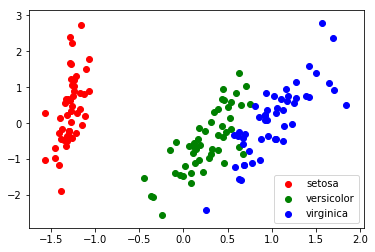

In [433]:
# plt.scatter(X_pca[iris.target == 0,0], X_pca[iris.target == 0, 1], c = 'r')
# plt.scatter(X_pca[iris.target == 1,0], X_pca[iris.target == 1, 1], c = 'b')
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
plt.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
               c = c, label = label)
plt.legend()
plt.show()